#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### In this scenario, we're going to predict the fuel consumption of the cars that are going to be released on the market soon. We will be using the Linear Regression technique on the data of the cars that are already being used. 
#### The dataset contains data from 1067 different cars with various features.
#### Our aim is to find connections between the fuel consumption and these features so that we will have a solid prediction on how many galloons the upcoming cars will consume. 

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### First, let's import the required libraries

In [3]:
import pandas as pd # To be able to handle data with ease (by employing dataframe structure)
import matplotlib.pyplot as plt # To visualize the data & models
import numpy as np # To be able to use .rand function when creating train and test datasets

from sklearn.linear_model import LinearRegression # Importing linear Regression module to use it in our code

### Importing the data from the internet

In [4]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-06-01 11:31:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

100%[======================================>] 72,629       412KB/s   in 0.2s   

2020-06-01 11:31:05 (412 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [5]:
# We have downloaded a fuel consumption dataset, FuelConsumption.csv, 
# which contains model-specific fuel consumption ratings and estimated CO2 emissions for the vehicles
df = pd.read_csv("FuelConsumption.csv")

# Simplifying the data by omitting some unnecessary columns for our analysis
dfRev = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
dfRev.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


### Creating Train and Test Dataset

In [6]:
# Lets split our dataset into train and test sets, 80% of the entire data for training and the 20% for testing.
# We create a mask to select random rows using np.random.rand() function:

msk = np.random.rand(len(dfRev)) < 0.8
train = dfRev[msk]
test = dfRev[~msk]

In [11]:
lr = LinearRegression() # Creating a linear regression object to train it with our data

# Our purpose here is to find out the relation between the engine size of a vehicle and CO2 Emission

X = np.asanyarray(train[['ENGINESIZE']])
Y = np.asanyarray(train[['CO2EMISSIONS']])

lr.fit (X, Y)
# The coefficients
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [[39.41838431]]
Intercept:  [124.74716023]


### Plotting our dataset and the Linear Regression Model

Text(0, 0.5, 'Emission')

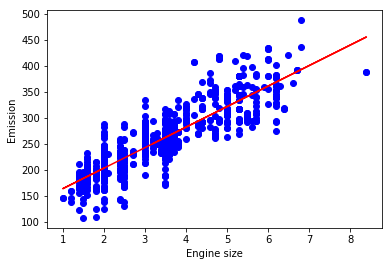

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(X, lr.coef_[0][0]*X + lr.intercept_[0], '-r')

plt.xlabel("Engine size")
plt.ylabel("Emission")